# 홀푸드 코리아 뉴스 관련기사 크롤링하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트
import os
import re


from bs4 import BeautifulSoup
from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
import time
from time import sleep
from tqdm import tqdm
from urllib.parse import quote
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
import time
import pyperclip
import urllib.request
import requests
import urllib.parse 
from urllib import parse
import ssl

context = ssl._create_unverified_context()


In [2]:
#iframe 제거 후 blog.naver.com 붙이기
def delete_iframe(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status() # 문제시 프로그램 종료
    soup = BeautifulSoup(res.text, "lxml") 

    src_url = "https://blog.naver.com/" + soup.iframe["src"]
    
    return src_url


In [5]:
def convert_date(s):
    if len(s) == 11:
        return s[:-1]

    today = datetime.now()
    if '어제' in s:
        date = today - timedelta(1)
    elif '일' in s:
        date = today - timedelta(int(s[:-3]))
    elif '시간' in s:
        date = today - timedelta(hours=int(s[:-4]))
    elif '분' in s:
        date = today - timedelta(minutes=int(s[:-3]))

    return f'{date.year}.{date.month:02d}.{date.day:02d}'

In [4]:
from datetime import datetime, timedelta
today = datetime.now()          # datetime.today()
today

datetime.datetime(2022, 4, 14, 23, 50, 49, 800106)

In [6]:
with open('D:\\WorkSpace\\mykey\\Naver_pw.txt') as file: # 윈도우
    PASSWORD = file.read()
with open('D:\\WorkSpace\\mykey\\Naver_ID.txt') as file: # 윈도우 
    ID = file.read()

In [5]:
pwd

'/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아'

In [16]:
driver = webdriver.Chrome(ChromeDriverManager().install()) # 리눅스



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/home/miwoos/.wdm/drivers/chromedriver/linux64/100.0.4896.60/chromedriver] found in cache
/tmp/ipykernel_418056/2286245328.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install()) # 리눅스


In [7]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}

In [6]:
## 리눅스
with open('/home/miwoos/WorkSpace/mykey/Naver_pw.txt') as file: 
    PASSWORD = file.read()
with open('/home/miwoos/WorkSpace/mykey/Naver_ID.txt') as file:
    ID = file.read()

In [8]:
hallname = ['홀푸드코리아','홀리브','홀핏','제주스 양배추']

In [23]:
url = []
lines = []
for i,names in tqdm(enumerate(hallname)):
    try:   
        url.append(f'https://search.naver.com/search.naver?where=view&sm=tab_jum&query={quote(hallname[i])}')
        driver = webdriver.Chrome('chromedriver.exe')
        driver.get(url[i])
        time.sleep(2)
        body = driver.find_element_by_tag_name('body')
        for _ in range(50):
            body.send_keys(Keys.PAGE_DOWN)
            time.sleep(1)
            soup = BeautifulSoup(driver.page_source)
            lis = soup.select('li.bx._svp_item')
            len(lis)
        for li in lis:
            try:
                title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip()
                date = li.select_one('.sub_time.sub_txt').get_text().strip()
                desc = li.select_one('.api_txt_lines.dsc_txt').get_text().strip()
                href = li.select_one('a.api_txt_lines.total_tit._cross_trigger')['href']
                name = hallname[i]
                lines.append([title,convert_date(date),desc,href,name])
            except:
                 if li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip() == None:
                        title = '내용이없습니다.'
                 if li.select_one('.api_txt_lines.dsc_txt').get_text()==None:
                        desc == '내용이없습니다.'
    except:
        pass

0it [00:00, ?it/s]C:\Users\alsdn\AppData\Local\Temp/ipykernel_23792/2980271025.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')
C:\Users\alsdn\AppData\Local\Temp/ipykernel_23792/2980271025.py:9: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  body = driver.find_element_by_tag_name('body')
4it [04:38, 69.70s/it]


In [24]:
lines

[['[국내기사] "홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다", <전자신문>',
  '2019.02.13',
  "이 때문에 최근 '슈퍼푸드'라는 말도 많이 쓰이고 있는 것 같아요! 많은 식품 전문 기업 중에서도 '홀푸드코리아'라는 기업에 대한 기사 내용입니다. 함께 보실까요~? 홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다...",
  'https://blog.naver.com/seoul_show1/221464773573',
  '홀푸드코리아'],
 ['인지질 크릴오일 / 홀푸드 코리아 크릴오일 추천 :: 홀리브 프로맥스 크릴오일',
  '2020.04.21',
  '이 중 좋은 원료로 만드는 건강기능식품 브랜드 홀푸드 코리아 제품을 선정했으며 좀 더 신뢰감과... 인지질58% #청정크릴오일 #인지질#크릴오일#홀푸드코리아#크릴오일추천#홀리브프로맥스크릴오일',
  'https://blog.naver.com/ryujin2919/221921263479',
  '홀푸드코리아'],
 ['[크릴오일] 홀푸드코리아 홀리브 프로맥스 크릴오일 먹어봅니다~',
  '2020.04.02',
  'ㅋㅋㅋㅋㅋ 홀푸드코리아 홀리브 프로맥스 크릴오일 1박스(1개월분) / 32900원 크릴오일 종류가 정말 다양한데 검색하다가 홀푸드코리아를 알게 되었습니다~ 홀푸드코리아는 좋은 원료가 아니면 만들지 않고, 오직 좋은...',
  'https://blog.naver.com/hoyin3344/221886505451',
  '홀푸드코리아'],
 ['[기타] 홀푸드코리아(주)를 소개합니다.',
  '2021.08.16',
  '기타 기업 회사명 : 홀푸드코리아(주) 대표이사 : 김대원 설립일 : 2013년 01월 01일 주소지... 개발 및 유통 홈페이지 주소 : http://whfoods.co.kr/ 첨부파일 홀푸드코리아(주)_회사소개서.pdf 파일 다운로드',
  'https://blog.naver.com/hopelinkhonam/222472328860',
  '홀푸드코리

In [25]:
df = pd.DataFrame(lines, columns=['제목','날짜','내용','href','제품명'])
df[['제목','날짜','내용','href','제품명']].head()

,제목,날짜,내용,href,제품명
0,"[국내기사] ""홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다"", <전자신문>",2019.02.13,이 때문에 최근 '슈퍼푸드'라는 말도 많이 쓰이고 있는 것 같아요! 많은 식품 전문...,https://blog.naver.com/seoul_show1/221464773573,홀푸드코리아
1,인지질 크릴오일 / 홀푸드 코리아 크릴오일 추천 :: 홀리브 프로맥스 크릴오일,2020.04.21,이 중 좋은 원료로 만드는 건강기능식품 브랜드 홀푸드 코리아 제품을 선정했으며 좀 ...,https://blog.naver.com/ryujin2919/221921263479,홀푸드코리아
2,[크릴오일] 홀푸드코리아 홀리브 프로맥스 크릴오일 먹어봅니다~,2020.04.02,ㅋㅋㅋㅋㅋ 홀푸드코리아 홀리브 프로맥스 크릴오일 1박스(1개월분) / 32900원 ...,https://blog.naver.com/hoyin3344/221886505451,홀푸드코리아
3,[기타] 홀푸드코리아(주)를 소개합니다.,2021.08.16,기타 기업 회사명 : 홀푸드코리아(주) 대표이사 : 김대원 설립일 : 2013년 0...,https://blog.naver.com/hopelinkhonam/222472328860,홀푸드코리아
4,"[홀푸드뉴스] 홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다",2019.01.15,1월 11일 전자신문에 최근 식품 트렌드와 그에 발맞춰 가는 홀푸드코리아의 건강 지...,https://blog.naver.com/wholeberry/221442502675,홀푸드코리아


In [26]:
df.head(2)

,제목,날짜,내용,href,제품명
0,"[국내기사] ""홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다"", <전자신문>",2019.02.13,이 때문에 최근 '슈퍼푸드'라는 말도 많이 쓰이고 있는 것 같아요! 많은 식품 전문...,https://blog.naver.com/seoul_show1/221464773573,홀푸드코리아
1,인지질 크릴오일 / 홀푸드 코리아 크릴오일 추천 :: 홀리브 프로맥스 크릴오일,2020.04.21,이 중 좋은 원료로 만드는 건강기능식품 브랜드 홀푸드 코리아 제품을 선정했으며 좀 ...,https://blog.naver.com/ryujin2919/221921263479,홀푸드코리아


In [27]:
df.to_csv('홀푸드코리아.csv',index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      375 non-null    object
 1   날짜      375 non-null    object
 2   내용      375 non-null    object
 3   href    375 non-null    object
 4   제품명     375 non-null    object
dtypes: object(5)
memory usage: 14.8+ KB


In [32]:
contentss = []
for j in tqdm(range(len(df.href))):
    try :
        html = urllib.request.urlopen(delete_iframe(df.href[j])).read())
        soup = BeautifulSoup(html,'html.parser') 
        contents=  ''
        content=list(soup.find_all('div',class_='se-module se-module-text'))
        for i,item in enumerate(list(soup.find_all('div',class_='se-module se-module-text'))):
            contents += item.text
    except:
        pass
    contentss.append(contents)

100%|██████████| 375/375 [07:09<00:00,  1.15s/it]


In [33]:
len(contentss)

375

In [37]:
print(contentss[1])


​​요즘 그렇게 핫하다는 크릴오일. 최근 급속도로 판매량이 올라가고 있다. 나 또한 아빠를 통해 처음으로 접했는데 이렇게 중년들에게 인기가 많을지는 생각지 못했다.  ​

​부모님께 선물로 드리기 위해 내가 선택한 건 '홀리브 프로맥스 크릴오일'크릴오일은 여러가지가 있으며 가격도 천차만별이다.이 중 좋은 원료로 만드는 건강기능식품 브랜드 홀푸드 코리아 제품을 선정했으며 좀 더 신뢰감과 믿음이 간다. ​

1. 핵심성분인 인지질 함량이 58%이상 함유.2. 크릴오일로만 100%3. 추춘방법은 분말화공정 선상가공과 효소가수분해공법을 사용3. 슈퍼비타민 E로 불리는 아스타진틴 함량 높음

홈페이지 참고.크릴오일은 인지질이 가장 중요하다던데, 인지질 58%이상이며 아스타잔틴, 엄격한 산가관리까지 공개하니 믿음이 간다. 

택배가 도착했다.빨간 빛의 외관.

한달 치 크릴오일 한박스.섭취방법은 1일 1회 1캡슐을 물과 함께 섭취하기.

정밀한 모습을 위하여 언박싱 동영상을 찍어보았다.언뜻 ASMR 같음.

​

한 알을 열어서,

물과함께 섭취한다.한입에 넣기 좋을 크릴 오일. 부모님도 만족하면서 드시고 계신다.  부모님께 이것저것 챙겨드리려고 하는데 이렇게라도 효도해야겠다!​판매처 ↘​https://smartstore.naver.com/wholeliv/products/4850588409

​#크릴오일 #홀리브프로맥스업 #인지질58% #청정크릴오일#인지질#크릴오일#홀푸드코리아#크릴오일추천#홀리브프로맥스크릴오일​

​



In [38]:
df['본문내용'] = contentss

In [39]:
df.to_csv('홀푸드코리아.csv',index=False)

In [15]:
hallname = '건강기능식품'
lines = []
url = (f'https://search.naver.com/search.naver?query={quote(hallname)}&nso=&where=blog&sm=tab_opt')
# driver = webdriver.Chrome(ChromeDriverManager().install()) # 리눅스
driver = webdriver.Chrome('chromedriver.exe') # 윈도우
driver.get(url)
time.sleep(2)
body = driver.find_element_by_tag_name('body')
for _ in range(200):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source)
    lis = soup.select('li.bx._svp_item')
    len(lis)
for li in tqdm(lis):
    try:
        title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip()
        date = li.select_one('.sub_time.sub_txt').get_text().strip()
        desc = li.select_one('.api_txt_lines.dsc_txt').get_text().strip()
        href = li.select_one('a.api_txt_lines.total_tit._cross_trigger')['href']
        name = hallname[i]
        lines.append([title,convert_date(date),desc,href,name])
    except:
            if li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip() == None:
                title = '내용이없습니다.'
            if li.select_one('.api_txt_lines.dsc_txt').get_text()==None:
                desc = '내용이없습니다.'

C:\Users\alsdn\AppData\Local\Temp/ipykernel_21584/3468761289.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe') # 윈도우
C:\Users\alsdn\AppData\Local\Temp/ipykernel_21584/3468761289.py:8: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  body = driver.find_element_by_tag_name('body')
0it [00:00, ?it/s]


In [16]:
df = pd.DataFrame(lines, columns=['제목','날짜','내용','href','제품명'])
contentss = []
for j in tqdm(range(len(df.href))):
    try :
        html = urllib.request.urlopen(delete_iframe(df.href[j])).read()
        soup = BeautifulSoup(html,'html.parser') 
        contents=  ''
        content=list(soup.find_all('div',class_='se-module se-module-text'))
        for i,item in enumerate(list(soup.find_all('div',class_='se-module se-module-text'))):
            contents += item.text
    except:
        pass
    contentss.append(contents)
df['본문내용'] = contentss
df.to_csv('건강기능식품.csv',index=False)

0it [00:00, ?it/s]


In [17]:
df

,제목,날짜,내용,href,제품명,본문내용


In [4]:
df4 = pd.read_csv('홀푸드코리아.csv')

In [6]:
df4.제품명.unique()

array(['홀푸드코리아', '홀리브', '홀핏', '제주스 양배추'], dtype=object)

In [16]:
df4[df4.제품명=='제주스 양배추']

,제목,날짜,내용,href,제품명,본문내용
261,양배추브로콜리즙 제주스 양배추즙 깨끗한 섬 제주에서~,2021.02.26,또 제주스 양배추브로콜리즙은 개그맨 염경환씨가 모델을 하고있어요!!! 양배추만 들어...,https://blog.naver.com/qkrd137/222257410502,제주스 양배추,\n​​​​제주스 양배추브로콜리즙은 깨끗한 섬 제주에서 재배부터 가공까지 책임지는믿...
262,양배추브로콜리즙 제주스 양배추진액으로 편하게,2021.02.16,제주스양배추즙은 양배추 심지까지 통째로 넣어 만들었어요. 개그맨 염경환이 까다롭게 ...,https://blog.naver.com/mallac2/222246134909,제주스 양배추,"\n요즘은 학교급식이 당연하게 생각되지만, 10년전만 해도 도시락을 싸가지고 다녔던..."
263,제주스 '양배추브로콜리즙'으로 그린채소 맛있게 즐기기,2021.02.28,#양배추즙 #양배추진액 #양배추브로콜리즙 #양배추즙추천 #제주스 #제주스양배추즙 #...,https://blog.naver.com/min_ji73/222260095230,제주스 양배추,\n즐겨드시는 건강음료 있으세요?밈미가 그린푸드 음료 하나 소개해드리려고요~🙋🏻​​...
264,맛좋은 제주스 유기농양배추즙 챙겨마셔요~!,2021.06.04,제주스 유기농양배추즙 유기농 양배추즙 제주스 유기농양배추즙 챙겨 마시기 #유기농양배...,https://blog.naver.com/mjk2797/222384420230,제주스 양배추,\n​\n\n​\n\n🧃 유기농 양배추즙 🧃제주스 유기농양배추즙 챙겨 마시기​#유기...
265,건강즙 추천 제주스 유기농 양배추즙 제주도 양배추 효능,2021.05.01,유기농 양배추즙 추천 제주스 양배추즙은 30팩이 박스에 꽉 들어있어요. 이정도면 가...,https://blog.naver.com/laloversarah/222330227979,제주스 양배추,\n홈쇼핑에서 엄청난 판매 신화를 낸 건강즙으로 유명한 제주스의 유기농 양배추즙 ...
...,...,...,...,...,...,...
370,양배추효능 하루제주 양배추즙 제주산 고깔양배추 100% 착즙 80ml x 30포 50포,2022.01.02,"방문하기 제주스 JEJU 양배추 브로콜리 진액, 100ml, 30개입 상세페이지 방...",https://cafe.naver.com/onetwogogogo/16262?art=...,제주스 양배추,하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
371,행복한 양배추즙,2022.01.02,"방문하기 제주스 JEJU 양배추 브로콜리 진액, 100ml, 30개입 상세페이지 방...",https://cafe.naver.com/onetwogogogo/16272?art=...,제주스 양배추,하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
372,30개양배추즙 가격비교 가격정보 입니다.,2022.02.22,"5]) 12,700원 사용자 후기 갯수 ((16)) ▼ 상세정보더보기 ▼ 11위 제...",https://cafe.naver.com/rmffhqjfgkrpsl/633?art=...,제주스 양배추,하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
373,jcoop양배추즙30개80ml 가격비교 베스트 순위 한눈에 확인,2022.01.05,"0]) 29,350원 사용자 후기 갯수 ((19)) ▼ 상세정보더보기 ▼ 9위 제주...",https://cafe.naver.com/rmfldnscndjremfdmfeh/13...,제주스 양배추,하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...


In [17]:
from konlpy.tag import Okt 
okt = Okt()
import konlpy

In [19]:
df4.columns

Index(['제목', '날짜', '내용', 'href', '제품명', '본문내용'], dtype='object')

In [21]:
df4.본문내용

0      안녕하세요 여러분~ 서울국제수산식품전시회 사무국입니다!​추위가 가면 미세먼지가 오고...
1      \n​​요즘 그렇게 핫하다는 크릴오일. 최근 급속도로 판매량이 올라가고 있다. 나 ...
2      \n안녕하세요~​\n\n요즘 크릴오일이 한참 핫하잖아요 ㅋㅋㅋ​저는 평소에 인스턴트...
3      \n​기타 기업​회사명 : 홀푸드코리아(주)대표이사 : 김대원​설립일 : 2013년...
4      1-2인 소가구와 맞벌이 가구의 증가, 고령화로 계속해서 건강에 대한 관심이 높아지...
                             ...                        
370    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
371    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
372    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
373    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
374    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
Name: 본문내용, Length: 375, dtype: object

In [23]:
df4.본문내용[0]

'안녕하세요 여러분~ 서울국제수산식품전시회 사무국입니다!\u200b추위가 가면 미세먼지가 오고, 미세먼지가 가면 추위가 오고..여러모로 너무 힘든 겨울이에요ㅜㅜ\u200b\u200b오늘은 2019년도 식품 트렌드에 대한 기사를 요약해 보았습니다!요새 건강한 음식에 대한 인식이 점차 높아지고 있음을 몸소 느끼고 있는데요~많은 사람들이 몸에 좋은 식품을 점점 더 많이 찾고 있다고 합니다.이 때문에 최근 \'슈퍼푸드\'라는 말도 많이 쓰이고 있는 것 같아요!많은 식품 전문 기업 중에서도 \'홀푸드코리아\'라는 기업에 대한 기사 내용입니다.\u200b함께 보실까요~?\u200b\u200b홀푸드코리아, 2019 건강 지향 식품 트렌드 이끈다\u200b본격적인 고령화 사회에 접어들면서 건강에 대한 관심이 높아지고 있을 뿐만 아니라 국민소득 수준이 꾸준히 향상하고 있습니다. 이 덕분인지 작년에 이어 2019년 새해에도 어김없이 \'건강\'이 거의 대부분의 분야에서 트렌드를 이끄는 핵심 키워드로 꼽히고 있습니다.\u200b이러한 건강지향 트렌드에 많은 영향을 받고 있는 대표적인 분야는 바로 식품입니다. 현대인의 식단 트렌드는 \'간편식\'과 유기농 등의 프리미엄 \'건강지향\' 식품들을 중심으로 개편되고 있습니다.\u200b이와 같은 트렌드에 발맞춰 국내 식품 업계도 발 빠르게 ‘건강지향’에 초점을 맞춘 다양한 제품들을 선보이고 있는 추세입니다.\u200b대표적으로 식품 전문 벤처기업 홀푸드코리아㈜는 제주도에 본사, 서울에 식품연구소를 두고 있는 온라인 식품 유통 전문 기업으로, \'건강\'에 초점을 맞춘 다양한 신선식품, 가공식품, 건강기능식품을 국내 유수의 온라인 및 홈쇼핑 27개 채널에서 판매하고 있습니다. 2013년 국내 농산물 유통업체로 시작하여 소비자의 니즈를 공략하는 고품질 신선/가공식품을 발굴하여 시장에 소개하고 있는 홀푸드코리아는 제주도에서 찾은 건강한 유기농 채소 원료를 기반으로 한 건강음료 브랜드 ‘제주스’를 론칭해 소비자들의 이목을 끌기도 했습니다.\u

In [37]:
type(df4.본문내용[0])

str

In [40]:
import re
new_tokens =[]
for i in range(len(df4.본문내용)):
    new_token = re.sub('[^가-힣 ]', '', str(df4.본문내용[i]))
    new_tokens.append(new_token)

In [43]:
new_tokens

['안녕하세요 여러분 서울국제수산식품전시회 사무국입니다추위가 가면 미세먼지가 오고 미세먼지가 가면 추위가 오고여러모로 너무 힘든 겨울이에요오늘은 년도 식품 트렌드에 대한 기사를 요약해 보았습니다요새 건강한 음식에 대한 인식이 점차 높아지고 있음을 몸소 느끼고 있는데요많은 사람들이 몸에 좋은 식품을 점점 더 많이 찾고 있다고 합니다이 때문에 최근 슈퍼푸드라는 말도 많이 쓰이고 있는 것 같아요많은 식품 전문 기업 중에서도 홀푸드코리아라는 기업에 대한 기사 내용입니다함께 보실까요홀푸드코리아  건강 지향 식품 트렌드 이끈다본격적인 고령화 사회에 접어들면서 건강에 대한 관심이 높아지고 있을 뿐만 아니라 국민소득 수준이 꾸준히 향상하고 있습니다 이 덕분인지 작년에 이어 년 새해에도 어김없이 건강이 거의 대부분의 분야에서 트렌드를 이끄는 핵심 키워드로 꼽히고 있습니다이러한 건강지향 트렌드에 많은 영향을 받고 있는 대표적인 분야는 바로 식품입니다 현대인의 식단 트렌드는 간편식과 유기농 등의 프리미엄 건강지향 식품들을 중심으로 개편되고 있습니다이와 같은 트렌드에 발맞춰 국내 식품 업계도 발 빠르게 건강지향에 초점을 맞춘 다양한 제품들을 선보이고 있는 추세입니다대표적으로 식품 전문 벤처기업 홀푸드코리아는 제주도에 본사 서울에 식품연구소를 두고 있는 온라인 식품 유통 전문 기업으로 건강에 초점을 맞춘 다양한 신선식품 가공식품 건강기능식품을 국내 유수의 온라인 및 홈쇼핑 개 채널에서 판매하고 있습니다 년 국내 농산물 유통업체로 시작하여 소비자의 니즈를 공략하는 고품질 신선가공식품을 발굴하여 시장에 소개하고 있는 홀푸드코리아는 제주도에서 찾은 건강한 유기농 채소 원료를 기반으로 한 건강음료 브랜드 제주스를 론칭해 소비자들의 이목을 끌기도 했습니다출처  신지선 홀푸드코리아  건강 지향 식품 트렌드 이끈다 전자신문   이외에도 정말 다양한 식품 기업들이 더 몸에 좋고 건강한 제품을 내놓기 위해서힘쓰고 있는 것 같습니다 예전에 소비자들은 특히 면역력이 급격히 저하되는 겨울에건강식품을 찾곤

In [34]:
ndew_tokens

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '안',
 '녕',
 '하',
 '세',
 '요',
 ' ',
 '여',
 '러',
 '분',
 ' ',
 '서',
 '울',
 '국',
 '제',
 '수',
 '산',
 '식',
 '품',
 '전',
 '시',
 '회',
 ' ',
 '사',
 '무',
 '국',
 '입',
 '니',
 '다',
 '추',
 '위',
 '가',
 ' ',
 '가',
 '면',
 ' ',
 '미',
 '세',
 '먼',
 '지',
 '가',
 ' ',
 '오',
 '고',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '요',
 '즘',
 ' ',
 '그',
 '렇',
 '게',
 ' ',
 '핫',
 '하',
 '다',
 '는',
 ' ',
 '크',
 '릴',
 '오',
 '일',
 ' ',
 '최',
 '근',
 ' ',
 '급',
 '속',
 '도',
 '로',
 ' ',
 '판',
 '매',
 '량',
 '이',
 ' ',
 '올',
 '라',
 '가',
 '고',
 ' ',
 '있',
 '다',
 ' ',
 '나',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '안',
 '녕',
 '하',
 '세',
 '요',
 '요',
 '즘',
 ' ',
 '크',
 '릴',
 '오',
 '일',
 '이',
 ' ',
 '한',
 '참',
 ' ',
 '핫',
 '하',
 '잖',
 '아',
 '요',
 ' ',
 '저',
 '는',
 ' ',
 '평',
 '소',
 '에',
 ' ',
 '인',
 '스',
 '턴',
 '트',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '기',
 '타',
 ' ',
 '기',
 '업',
 '회',
 '사',
 '명',
 ' ',
 ' ',
 '홀',
 '푸',
 '드',
 '코',
 '리',
 '아',
 '주',
 '대',
 '표',
 '이',
 '사',
 ' ',
 ' ',
 '김',
 '대',
 '원'

In [30]:
tokens  = [ ]
new_tokens
for token in str(df4.본문내용):
    token = re.sub('[^가-힣]','', token)
    new_tokens.append(token)

In [32]:
len(new_tokens)

681

In [25]:
new_tokenss = okt.nouns(str(df4.본문내용))


In [27]:
len(new_tokenss)

99

In [44]:
new_tokenss = okt.nouns(str(new_tokens))

In [45]:
new_tokenss

['여러분',
 '서울',
 '국제',
 '수산',
 '식품',
 '전시회',
 '사무국',
 '추위',
 '가면',
 '미세먼지',
 '미세먼지',
 '가면',
 '추위',
 '모로',
 '겨울',
 '오늘',
 '년도',
 '식품',
 '트렌드',
 '대한',
 '기사',
 '요약',
 '요새',
 '음식',
 '대한',
 '인식',
 '점차',
 '음',
 '몸소',
 '사람',
 '몸',
 '식품',
 '점점',
 '더',
 '때문',
 '최근',
 '슈퍼',
 '푸드',
 '말',
 '것',
 '식품',
 '전문',
 '기업',
 '중',
 '홀',
 '푸드',
 '코리아',
 '기업',
 '대한',
 '기사',
 '내용',
 '홀',
 '푸드',
 '코리아',
 '건강',
 '지향',
 '식품',
 '트렌드',
 '본격',
 '고령화',
 '사회',
 '건강',
 '대한',
 '관심',
 '뿐',
 '국민소득',
 '수준',
 '향상',
 '이',
 '덕분',
 '작년',
 '년',
 '새해',
 '건강',
 '거의',
 '대부분',
 '분야',
 '트렌드',
 '핵심',
 '키',
 '워드',
 '건강',
 '지향',
 '트렌드',
 '영향',
 '대표',
 '분야',
 '바로',
 '식품',
 '현대인',
 '식단',
 '트렌드',
 '간편식',
 '유기농',
 '등',
 '프리미엄',
 '건강',
 '지향',
 '식품',
 '중심',
 '개편',
 '이',
 '트렌드',
 '발',
 '국내',
 '식품',
 '업계',
 '발',
 '건강',
 '지향',
 '초점',
 '제품',
 '추세',
 '대표',
 '식품',
 '전문',
 '벤처기업',
 '홀',
 '푸드',
 '코리아',
 '제주도',
 '본사',
 '서울',
 '식품',
 '연구소',
 '온라인',
 '식품',
 '유통',
 '전문',
 '기업',
 '건강',
 '초점',
 '신선',
 '식품',
 '가공',
 '식품',
 '건강',
 '기능',
 '식품',
 '국내',
 '유수',


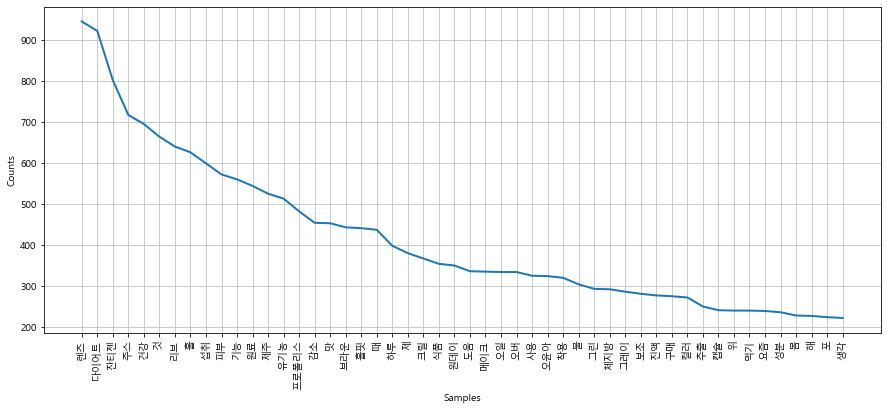

In [64]:
import nltk
yang = nltk.Text(new_tokensss, name='제주스 양배추')
plt.figure(figsize=(15,6))
yang.plot(50)
plt.show()

In [66]:
stop_words = '양배추 브로콜리 즙 콜라겐 제품 수 추천 더 저 분 느낌 포'
stop_list = stop_words.split()
new_tokensss = [token for token in new_tokenss if token not in stop_list]

In [67]:
data = yang.vocab().most_common(300)
data[:50]

[('렌즈', 946),
 ('다이어트', 923),
 ('잔티젠', 803),
 ('주스', 718),
 ('건강', 696),
 ('것', 665),
 ('리브', 641),
 ('홀', 627),
 ('섭취', 600),
 ('피부', 573),
 ('기능', 561),
 ('원료', 545),
 ('제주', 526),
 ('유기농', 514),
 ('프로폴리스', 483),
 ('감소', 455),
 ('맛', 454),
 ('브라운', 444),
 ('홀핏', 442),
 ('때', 438),
 ('하루', 399),
 ('제', 381),
 ('크릴', 368),
 ('식품', 355),
 ('원데이', 351),
 ('도움', 337),
 ('메이크', 336),
 ('오일', 335),
 ('오버', 335),
 ('사용', 326),
 ('오윤아', 325),
 ('착용', 321),
 ('물', 305),
 ('그린', 294),
 ('체지방', 293),
 ('그레이', 287),
 ('보조', 282),
 ('진액', 278),
 ('구매', 276),
 ('컬러', 273),
 ('추출', 251),
 ('캡슐', 242),
 ('위', 241),
 ('먹기', 241),
 ('요즘', 240),
 ('성분', 237),
 ('몸', 229),
 ('해', 228),
 ('포', 225),
 ('생각', 223)]

In [49]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [68]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

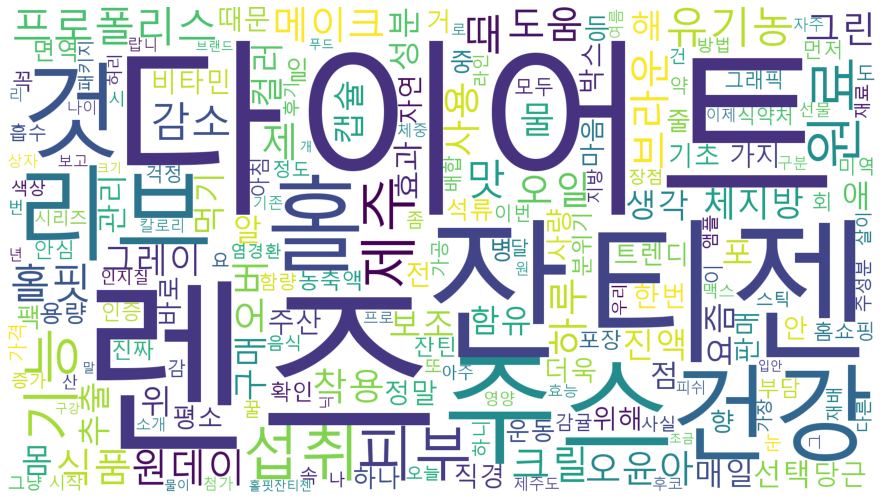

In [69]:
plt.figure(figsize=(16,9))
plt.imshow(wc)
plt.axis('off')
plt.show()